<h1>디지털신호처리 과제 2</h1>
<h2>컴퓨터과학과 202015052 최혜주</h2>

<h3>Exercise 1.2</h3>

Go to http://freesound.org and download a sound sample that includes music, speech, or other sounds that have a well-defined pitch. Select a roughly half-second segment where the pitch is constant. Compute and plot the spectrum of the segment you selected. What connection can you make between the timbre of the sound and the harmonic structure you see in the spectrum?

In [560]:
import thinkdsp
import thinkplot

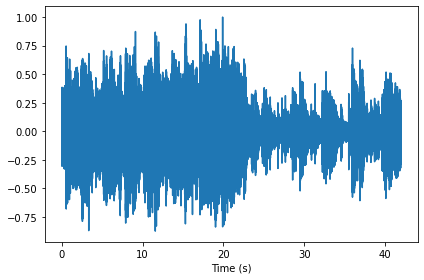

In [561]:
wave=thinkdsp.read_wave('./372005__tranquility-jadgroup__beautiful-violin-music.wav')
wave.plot()
decorate(xlabel='Time (s)')

위 차트를 참고하여 음높이가 지속되는 half-second segment 는 18.4 s 부터 0.5 s 로 정한다.

In [562]:
segment=wave.segment(start=18.4,duration=0.5)
segment.make_audio()

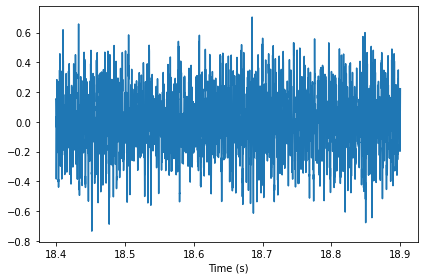

In [563]:
segment.plot()
decorate(xlabel='Time (s)')

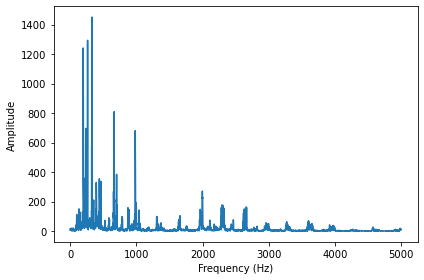

In [564]:
spectrum=segment.make_spectrum()
spectrum.plot(high=5000)
decorate(xlabel='Frequency (Hz)',ylabel='Amplitude')

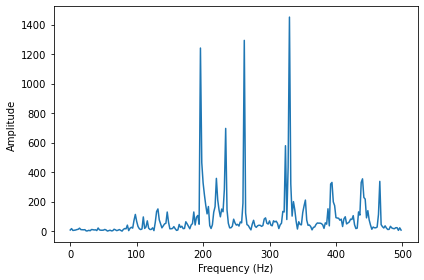

In [565]:
spectrum.plot(high=500)
decorate(xlabel='Frequency (Hz)',ylabel='Amplitude')

In [566]:
spectrum.peaks()[:20]

[(1451.109049828354, 330.0),
 (1293.3678164333562, 262.0),
 (1241.374589094312, 196.0),
 (809.5662408911978, 664.0),
 (696.5777238417568, 234.0),
 (680.533420140859, 982.0),
 (579.1673653916364, 324.0),
 (491.04490685976265, 984.0),
 (464.50249278261566, 198.0),
 (432.91703164271826, 328.0),
 (385.00413214637837, 700.0),
 (359.2158250416416, 660.0),
 (357.9027804011316, 220.0),
 (354.72702286324903, 440.0),
 (337.6123071747425, 466.0),
 (330.38090977448826, 394.0),
 (329.98494392553226, 438.0),
 (327.481993725366, 200.0),
 (320.10461883537755, 332.0),
 (319.61951071428285, 392.0)]

위 스펙트럼의 dominant frequency는 330 Hz 이다. Frequency가 330 Hz 보다 낮은 peak 262, 196 Hz 를 통해 fundamental frequency 는 C#2/Db2 에 가까운 약 67 Hz 인 것을 알 수 있다.


<h3>스펙트럼중 일부 frequency 구간 필터링</h3>

fundamental frequency와 dominant frequency 까지 하모니를 이루는 구간 뒤 higher frequency 구간 상당 부분 필터링하지만 음높이(pitch)에 큰 차이는 없는 것처럼 느껴진다.

In [567]:
spectrum=segment.make_spectrum()
spectrum.band_stop(1100,5000)
spectrum.make_wave().make_audio()

<h3>메이저 코드 필터링</h3>

하지만 fundamental과 하모니를 이루는 메이저 코드가 포함된 구간(196, 262, 330 Hz)을 필터링 하면 음높이의 차이가 다소 커진다.

In [568]:
spectrum=segment.make_spectrum()
spectrum.band_stop(0,500)
spectrum.make_wave().make_audio()

fundamental과 그 하모니를 이루는 components 들이 우리가 인식하는 음높이와 음색결정에 큰 영향을 미친다는 것을 알 수 있다.